In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ODIs - Batting.csv')
df.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1
1,IR Bell (2004-2015),2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
2,PD Collingwood (2001-2011),2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,JE Root (2013-2018),2013-2018,2013,2018,121,115,19,4946,133*,133,...,5722,86.43,13,29,4,England,1,0,1,0
4,AJ Stewart (1989-2003),1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0


In [4]:
nrows, ncols = df.shape
print(f"There are {nrows} rows and {ncols} columns")

There are 1984 rows and 21 columns


In [5]:
df.columns

Index(['Player', 'Career Span', 'Career Start', 'Career End', 'Matches Played',
       'Innings Batted', 'Not Outs', 'Runs Scored', 'Highest Innings Score',
       'Highest Innings Score Num', 'Batting Avg', 'Balls Faced',
       'Batting Strike Rate', 'Hundreds Scored', 'Scores Of Fifty Or More',
       'Ducks Scored', 'Country', 'Player Count', '5000+ Runs Scored',
       '40+ Batting Avg', '90+ Batting Strike Rate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 21 columns):
Player                       1984 non-null object
Career Span                  1984 non-null object
Career Start                 1984 non-null int64
Career End                   1984 non-null int64
Matches Played               1984 non-null int64
Innings Batted               1984 non-null object
Not Outs                     1984 non-null object
Runs Scored                  1984 non-null object
Highest Innings Score        1984 non-null object
Highest Innings Score Num    1984 non-null object
Batting Avg                  1984 non-null object
Balls Faced                  1984 non-null object
Batting Strike Rate          1984 non-null object
Hundreds Scored              1984 non-null object
Scores Of Fifty Or More      1984 non-null object
Ducks Scored                 1984 non-null object
Country                      1984 non-null object
Player Count                 1984 non-null int

In [7]:
# Let's change the objects to numbers
df['Innings Batted'] = pd.to_numeric(df['Innings Batted'], errors='coerce')
df['Not Outs'] = pd.to_numeric(df['Not Outs'], errors='coerce')
df['Runs Scored'] = pd.to_numeric(df['Runs Scored'], errors='coerce')
df['Batting Avg'] = pd.to_numeric(df['Batting Avg'], errors='coerce')
df['Balls Faced'] = pd.to_numeric(df['Balls Faced'], errors='coerce')
df['Batting Strike Rate'] = pd.to_numeric(df['Batting Strike Rate'], errors='coerce')
df['Hundreds Scored'] = pd.to_numeric(df['Hundreds Scored'], errors='coerce')
df['Scores Of Fifty Or More'] = pd.to_numeric(df['Scores Of Fifty Or More'], errors='coerce')
df['Ducks Scored'] = pd.to_numeric(df['Ducks Scored'], errors='coerce')

In [11]:
country_df = df.groupby('Country')

In [19]:
df['Country'].unique()

array(['England', 'Australia', 'South Africa', 'West Indies',
       'New Zealand', 'India', 'Pakistan', 'Sri Lanka', 'Zimbabwe',
       'Bangladesh', 'Ireland', 'Afghanistan'], dtype=object)

In [44]:
# country_df['Runs Scored'].max()
idx = country_df['Runs Scored'].transform(max) == df['Runs Scored']
country_top_scorers = df[idx]

In [107]:
country_top_scorers

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176.0,27.0,5813.0,124*,124,...,6310.0,92.12,10.0,36.0,11.0,England,1,1,0,1
251,RT Ponting (1995-2012),1995-2012,1995,2012,374,364.0,39.0,13589.0,164,164,...,16944.0,80.19,29.0,82.0,20.0,Australia,1,1,1,0
477,JH Kallis (1996-2014),1996-2014,1996,2014,323,309.0,53.0,11550.0,139,139,...,15793.0,73.13,17.0,86.0,17.0,South Africa,1,1,1,0
606,BC Lara (1990-2007),1990-2007,1990,2007,295,285.0,32.0,10348.0,169,169,...,12996.0,79.62,19.0,62.0,14.0,West Indies,1,1,1,0
794,SP Fleming (1994-2007),1994-2007,1994,2007,279,268.0,21.0,8007.0,134*,134,...,11214.0,71.40,8.0,49.0,17.0,New Zealand,1,1,0,0
989,SR Tendulkar (1989-2012),1989-2012,1989,2012,463,452.0,41.0,18426.0,200*,200,...,21367.0,86.23,49.0,96.0,20.0,India,1,1,1,0
1213,Inzamam-ul-Haq (1991-2007),1991-2007,1991,2007,375,348.0,52.0,11701.0,137*,137,...,15769.0,74.20,10.0,83.0,20.0,Pakistan,1,1,0,0
1431,KC Sangakkara (2000-2015),2000-2015,2000,2015,397,373.0,40.0,13975.0,169,169,...,17715.0,78.88,25.0,90.0,15.0,Sri Lanka,1,1,1,0
1619,A Flower (1992-2003),1992-2003,1992,2003,213,208.0,16.0,6786.0,145,145,...,9097.0,74.59,4.0,55.0,13.0,Zimbabwe,1,1,0,0
1758,Tamim Iqbal (2007-2018),2007-2018,2007,2018,186,184.0,8.0,6450.0,154,154,...,8254.0,78.14,11.0,44.0,16.0,Bangladesh,1,1,0,0


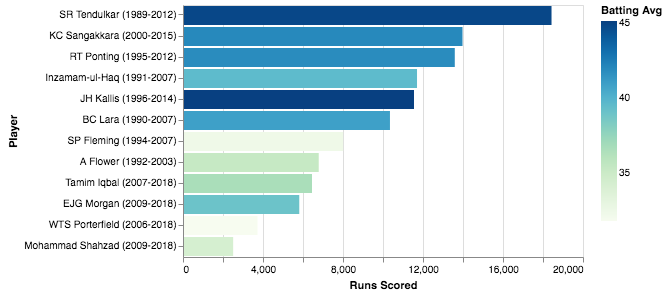

In [124]:
# Top Scorers by Country
alt.Chart(country_top_scorers).mark_bar().encode(
    x='Runs Scored:Q',
    y=alt.Y('Player:N', sort=alt.Sort(field="Runs Scored", op="sum", order='descending')),
    color=alt.Color('Batting Avg:Q', scale=alt.Scale(scheme='greenblue'))
)

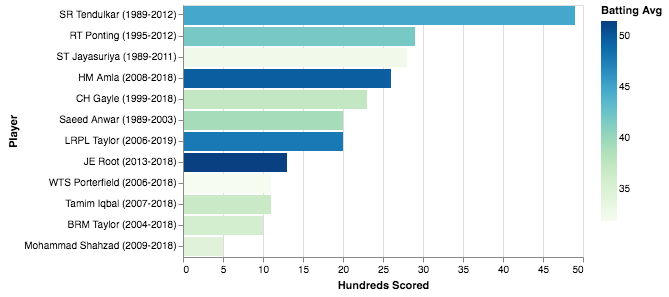

In [128]:
# Max Hundreds by Country
idx = country_df['Hundreds Scored'].transform(max) == df['Hundreds Scored']
country_top_hundreds = df[idx]

alt.Chart(country_top_hundreds).mark_bar().encode(
    x='Hundreds Scored:Q',
    y=alt.Y('Player:N', sort=alt.Sort(field="Hundreds Scored", op="sum", order='descending')),
    color=alt.Color('Batting Avg:Q', scale=alt.Scale(scheme='greenblue'))
)

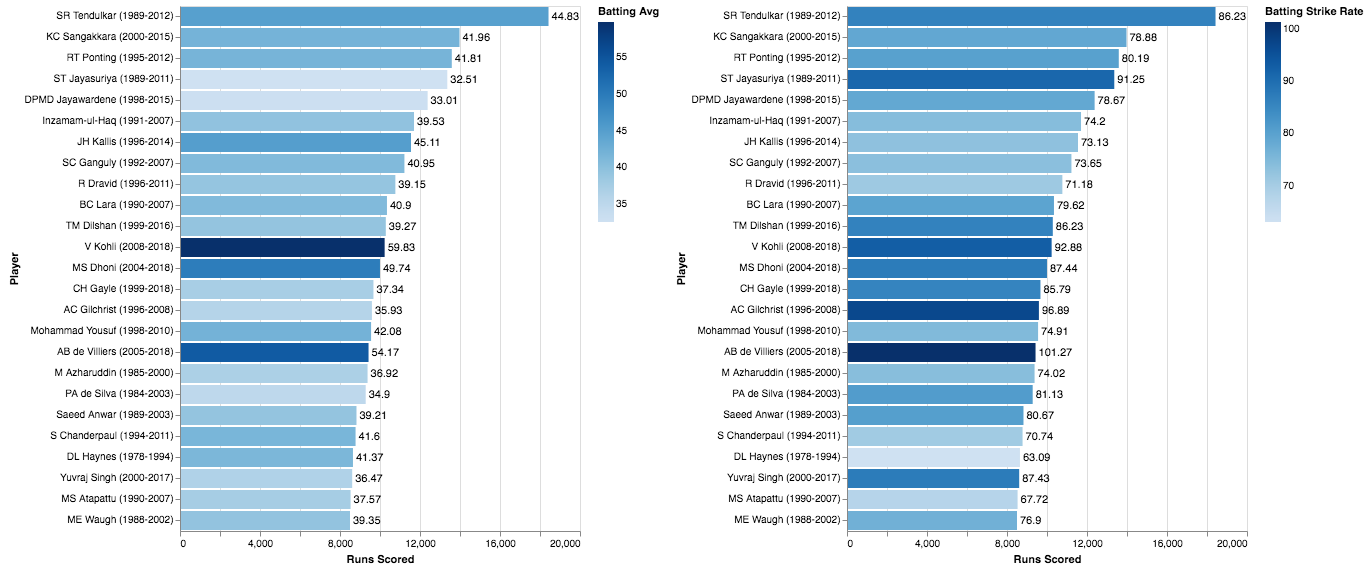

In [161]:
top_players = df.sort_values('Runs Scored', ascending=False)
top_players = top_players.head(25)

runs_base = alt.Chart(top_players).encode(
    x=alt.X('Runs Scored:Q'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    tooltip=['Matches Played', 'Batting Strike Rate', 'Hundreds Scored']
)

avg_bars = runs_base.mark_bar().encode(
    color='Batting Avg:Q',
)

str_bars = runs_base.mark_bar().encode(
    color=alt.Color('Batting Strike Rate:Q', scheme='greens')
)

text1 = runs_base.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Batting Avg:Q'
)

text2 = runs_base.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Batting Strike Rate:Q'
)

chart1 = (avg_bars + text1)
chart2 = (str_bars + text2)
alt.hconcat(chart1, chart2).resolve_scale(color='independent')

In [28]:
india_df = df[df['Country']=="India"]
india_df.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
989,SR Tendulkar (1989-2012),1989-2012,1989,2012,463,452.0,41.0,18426.0,200*,200,...,21367.0,86.23,49.0,96.0,20.0,India,1,1,1,0
990,SC Ganguly (1992-2007),1992-2007,1992,2007,308,297.0,23.0,11221.0,183,183,...,15235.0,73.65,22.0,71.0,16.0,India,1,1,1,0
991,R Dravid (1996-2011),1996-2011,1996,2011,340,314.0,39.0,10768.0,153,153,...,15126.0,71.18,12.0,82.0,13.0,India,1,1,0,0
992,V Kohli (2008-2018),2008-2018,2008,2018,216,208.0,37.0,10232.0,183,183,...,11016.0,92.88,38.0,48.0,12.0,India,1,1,1,1
993,MS Dhoni (2004-2018),2004-2018,2004,2018,329,278.0,77.0,9999.0,183*,183,...,11435.0,87.44,9.0,67.0,9.0,India,1,1,1,0


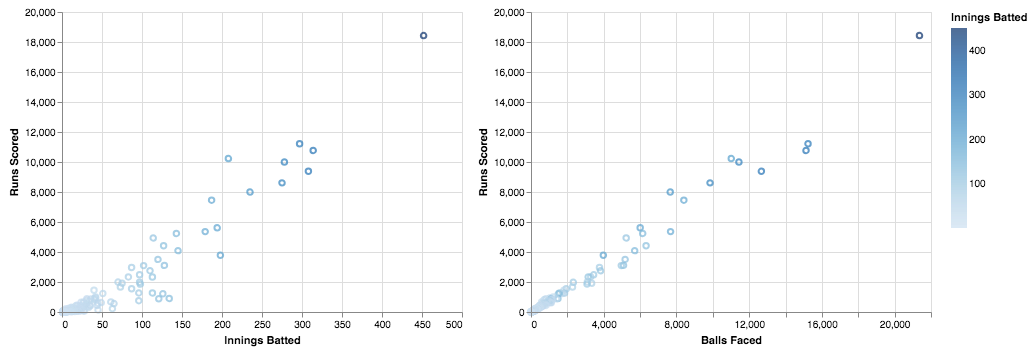

In [33]:
innings = alt.Chart(india_df).mark_point().encode(
    x='Innings Batted:Q',
    y='Runs Scored:Q',
    color='Innings Batted:Q',
    tooltip=['Player']
)

rule = alt.Chart(india_df).mark_rule(color='red').encode(
    x='mean(Runs Scored):Q'
)

balls = alt.Chart(india_df).mark_point().encode(
    x='Balls Faced:Q',
    y='Runs Scored:Q',
    color='Innings Batted:Q',
    tooltip=['Player']
)

innings | balls

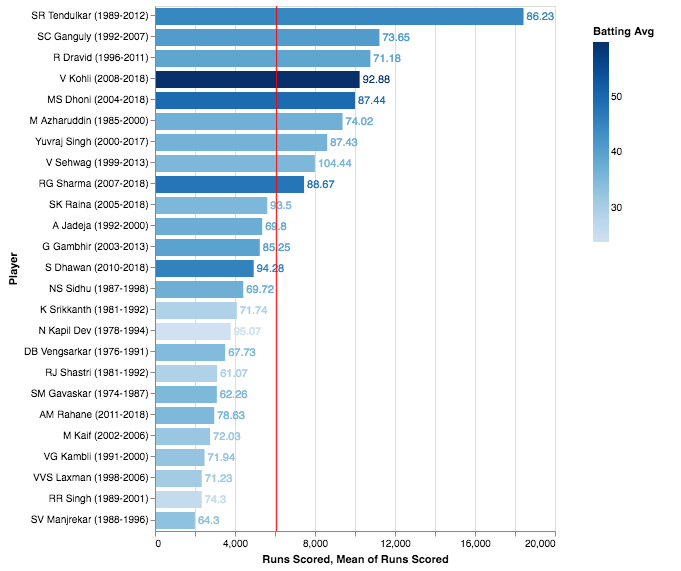

In [41]:
india_top_df = india_df.head(25)
bars = alt.Chart(india_top_df).mark_bar().encode(
    x=alt.X('Runs Scored:Q'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    color='Batting Avg:Q',
    tooltip=['Matches Played', 'Batting Strike Rate', 'Hundreds Scored']
)

rule = alt.Chart(india_top_df).mark_rule(color='red').encode(
    x='mean(Runs Scored):Q'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Batting Strike Rate:Q'
)

(bars + text + rule).configure_scale(bandPaddingInner=0.2).configure_legend(padding=20)

In [ ]:
bangladesh_df = df[df['Country']=="Bangladesh"]

In [ ]:
bangladesh_top_df = bangladesh_df.head(25)
bars = alt.Chart(bangladesh_top_df).mark_bar().encode(
    x=alt.X('Runs Scored:Q'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    color='Innings Batted:Q',
    tooltip=['Matches Played', 'Strike Rate']
)

rule = alt.Chart(bangladesh_top_df).mark_rule(color='red').encode(
    x='mean(Runs Scored):Q'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Strike Rate:Q'
)

(bars + text + rule).configure_scale(bandPaddingInner=0.2).configure_legend(padding=20)

In [ ]:
innings = alt.Chart(bangladesh_top_df.head(7)).mark_point().encode(
    x=alt.X('Innings Batted:Q', 
        scale=alt.Scale(zero=False)),
    y='Runs Scored:Q',
    tooltip=['Player']
)

text = innings.mark_text(
    align='left',
    baseline='top',
    dx=10,
    dy=-5,
    angle=20
).encode(
    text='Player:N'
)

(innings + text).configure_axis(labelOverlap=True)